In [2]:
"""
import os
import xarray as xr

# Folder where all the .nc files are stored
nc_directory = "../CH_data/CH_output_data/nival_no_regulation"

# List of all .nc files in the directory
nc_files = [os.path.join(nc_directory, f) for f in os.listdir(nc_directory) if f.endswith('.nc')]

# Load each .nc file as an xarray Dataset and compute the mean of each variable
datasets = [xr.open_dataset(f) for f in nc_files]

# Take the mean across all datasets for each variable
mean_ds = xr.concat(datasets, dim="iteration").mean(dim="iteration")

# Display the final dataset with mean values
mean_ds
"""

C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:        (init_date: 9, target_period: 9)
Coordinates:
  * init_date      (init_date) object '01/01' '01/02' ... '01/08' '01/09'
  * target_period  (target_period) object '1Jan-30Sep' ... '1Sep-30Sep'
Data variables:
    R2             (init_date, target_period) float64 0.1173 0.1347 ... 0.1771
    KGE"           (init_date, target_period) float64 -0.03233 ... -0.3637
    KGE"_r         (init_date, target_period) float64 0.1922 0.1103 ... -0.111
    KGE"_alpha     (init_date, target_period) float64 0.4351 0.4569 ... 0.6347
    KGE"_beta      (init_date, target_period) float64 0.01088 ... 0.05008
    perc_diff      (init_date, target_period) float64 2.399 2.467 ... nan 7.116

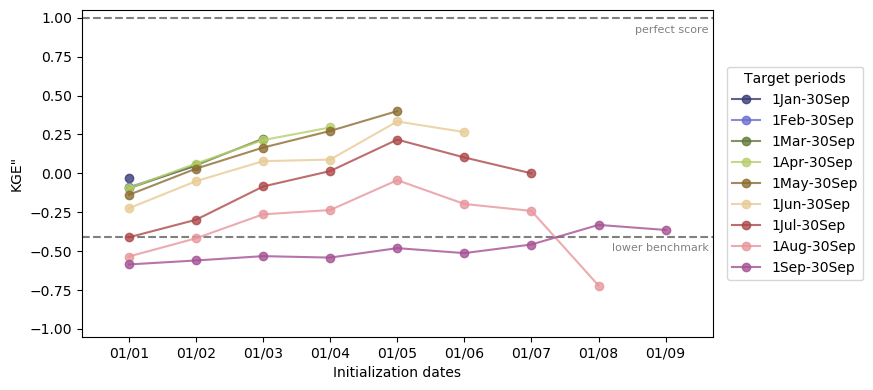

In [3]:
"""
import matplotlib.pyplot as plt
import numpy as np

# Use the mean dataset loaded earlier (mean_ds) for the 'KGE"' data
KGE_mean = mean_ds['KGE"']

# Initialize elements for the plot
fig = plt.figure(figsize=(9, 4))
elem = -1
cmap = plt.cm.get_cmap('tab20b')
rgbas = []
target_periods = mean_ds.target_period.values
init_dates = mean_ds.init_date.values

# Loop over the target periods to plot
for t in target_periods:
    elem += 1
    rgba = cmap((1 * elem) / len(target_periods))
    rgbas.append(rgba)

    # Select and plot the KGE" mean data for each target period
    toplot = KGE_mean.sel(target_period=t)
    plt.plot(np.arange(len(toplot.init_date)), toplot.values, marker='o', color=rgba, alpha=.8, label=t)

# Add elements to the plot
plt.ylim(-1.05, 1.05)
plt.xlim(-.7, len(init_dates) - .3)
plt.plot([-.7, len(init_dates) - .3], [-.41, -.41], color='grey', ls='--', zorder=1)
plt.annotate('lower benchmark', (len(init_dates) - 1.8, -.5), color='grey', fontsize=8)
plt.plot([-.7, len(init_dates) - .3], [1, 1], color='grey', ls='--', zorder=1)
plt.annotate('perfect score', (len(init_dates) - 1.45, .9), color='grey', fontsize=8)
plt.xticks(np.arange(0, len(init_dates)), init_dates)
plt.xlabel('Initialization dates')
plt.ylabel('KGE"')
plt.legend(title='Target periods', loc='center right', bbox_to_anchor=(1.25, .5))
plt.tight_layout()

# Display the plot
plt.show()
"""

In [4]:
# Save the figure
"""
# fig.savefig('../CH_data/CH_output_plots/evaluation/KGE_nival_no_regulation_mean.png', dpi=300)
fig.savefig('../CH_data/evaluation_20241129/KGE_nival_no_regulation_mean.png', dpi=300)
"""

In [5]:
# List of all .nc files in the directory
"""
nc_files = [os.path.join(nc_directory, f) for f in os.listdir(nc_directory) if f.endswith('.nc')]

# Load each .nc file as an xarray Dataset and compute the median of each variable
datasets = [xr.open_dataset(f) for f in nc_files]

# Take the median across all datasets for each variable
median_ds = xr.concat(datasets, dim="iteration").median(dim="iteration")
"""


<xarray.Dataset>
Dimensions:        (init_date: 9, target_period: 9)
Coordinates:
  * init_date      (init_date) object '01/01' '01/02' ... '01/08' '01/09'
  * target_period  (target_period) object '1Jan-30Sep' ... '1Sep-30Sep'
Data variables:
    R2             (init_date, target_period) float64 0.07 0.06 ... nan 0.14
    KGE"           (init_date, target_period) float64 -0.01 -0.04 ... nan -0.45
    KGE"_r         (init_date, target_period) float64 0.22 0.16 ... nan -0.21
    KGE"_alpha     (init_date, target_period) float64 0.42 0.44 ... nan 0.37
    KGE"_beta      (init_date, target_period) float64 -0.0 0.01 0.0 ... nan 0.04
    perc_diff      (init_date, target_period) float64 1.795 1.975 ... nan 6.515

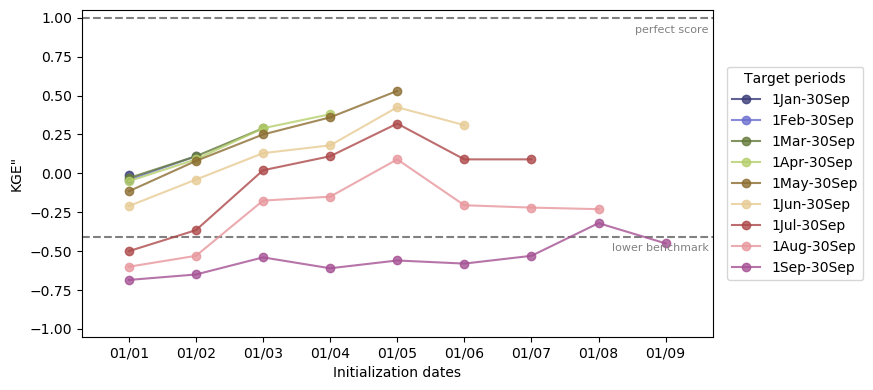

In [6]:
"""import matplotlib.pyplot as plt
import numpy as np

# Use the median dataset loaded earlier (median_ds) for the 'KGE"' data
KGE_median = median_ds['KGE"']

# Initialize elements for the plot
fig = plt.figure(figsize=(9, 4))
elem = -1
cmap = plt.cm.get_cmap('tab20b')
rgbas = []
target_periods = median_ds.target_period.values
init_dates = median_ds.init_date.values

# Loop over the target periods to plot
for t in target_periods:
    elem += 1
    rgba = cmap((1 * elem) / len(target_periods))
    rgbas.append(rgba)

    # Select and plot the KGE" median data for each target period
    toplot = KGE_median.sel(target_period=t)
    plt.plot(np.arange(len(toplot.init_date)), toplot.values, marker='o', color=rgba, alpha=.8, label=t)

# Add elements to the plot
plt.ylim(-1.05, 1.05)
plt.xlim(-.7, len(init_dates) - .3)
plt.plot([-.7, len(init_dates) - .3], [-.41, -.41], color='grey', ls='--', zorder=1)
plt.annotate('lower benchmark', (len(init_dates) - 1.8, -.5), color='grey', fontsize=8)
plt.plot([-.7, len(init_dates) - .3], [1, 1], color='grey', ls='--', zorder=1)
plt.annotate('perfect score', (len(init_dates) - 1.45, .9), color='grey', fontsize=8)
plt.xticks(np.arange(0, len(init_dates)), init_dates)
plt.xlabel('Initialization dates')
plt.ylabel('KGE"')
plt.legend(title='Target periods', loc='center right', bbox_to_anchor=(1.25, .5))
plt.tight_layout()

# Display the plot
plt.show()
"""

In [7]:
"""# Save the figure
#fig.savefig('../CH_data/CH_output_plots/evaluation/KGE_nival_no_regulation_median.png', dpi=300)
fig.savefig('../CH_data/evaluation_20241129/KGE_nival_no_regulation_median.png', dpi=300)
"""

<xarray.Dataset>
Dimensions:        (init_date: 9, target_period: 9)
Coordinates:
  * target_period  (target_period) object '1Jan-30Sep' ... '1Sep-30Sep'
  * init_date      (init_date) object '01/01' '01/02' ... '01/08' '01/09'
Data variables:
    R2             (init_date, target_period) float64 0.08 0.085 ... nan 0.08
    KGE"           (init_date, target_period) float64 -0.2 -0.24 ... nan -0.27
    KGE"_r         (init_date, target_period) float64 0.02 -0.01 ... nan -0.04
    KGE"_alpha     (init_date, target_period) float64 0.35 0.32 ... nan 0.31
    KGE"_beta      (init_date, target_period) float64 0.0 -0.0 ... nan 0.02
    perc_diff      (init_date, target_period) float64 1.83 1.99 1.99 ... nan 5.4


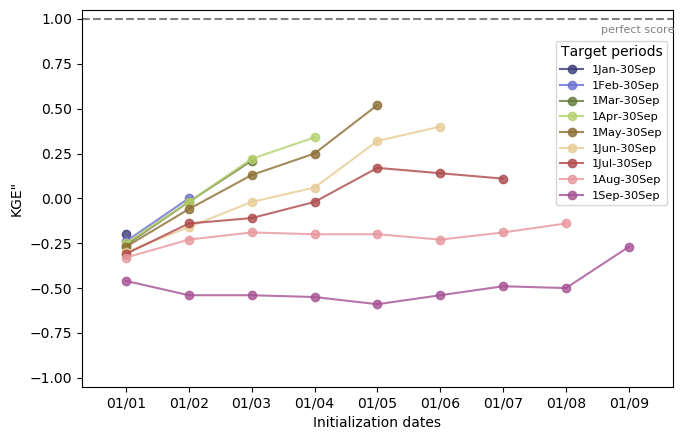

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
nival_path = "../CH_data/CH_camels_output_data/nival"

# List of all .nc files in the directory
nc_files = [os.path.join(nival_path, f) for f in os.listdir(nival_path) if f.endswith('.nc')]

# Load each .nc file as an xarray Dataset and compute the median of each variable
datasets = [xr.open_dataset(f) for f in nc_files]

# Take the median across all datasets for each variable
median_ds = xr.concat(datasets, dim="iteration").median(dim="iteration")

# Display the final dataset with median values
print(median_ds)

# Use the median dataset loaded earlier (median_ds) for the 'KGE"' data
KGE_median = median_ds['KGE"']

# Initialize elements for the plot
fig = plt.figure(figsize=(7, 4.5))
elem = -1
cmap = plt.cm.get_cmap('tab20b')
rgbas = []
target_periods = median_ds.target_period.values
init_dates = median_ds.init_date.values

# Loop over the target periods to plot
for t in target_periods:
    elem += 1
    rgba = cmap((1 * elem) / len(target_periods))
    rgbas.append(rgba)

    # Select and plot the KGE" median data for each target period
    toplot = KGE_median.sel(target_period=t)
    plt.plot(np.arange(len(toplot.init_date)), toplot.values, marker='o', color=rgba, alpha=.8, label=t)

# Add elements to the plot
plt.ylim(-1.05, 1.05)
plt.xlim(-.7, len(init_dates) - .3)
#plt.plot([-.7, len(init_dates) - .3], [-.41, -.41], color='grey', ls='--', zorder=1)
#plt.annotate('lower benchmark', (len(init_dates) - 1.8, -.5), color='grey', fontsize=8)
plt.plot([-.7, len(init_dates) - .3], [1, 1], color='grey', ls='--', zorder=1)
plt.annotate('perfect score', (len(init_dates) - 1.45, .92), color='grey', fontsize=8)
plt.xticks(np.arange(0, len(init_dates)), init_dates)
plt.xlabel('Initialization dates')
plt.ylabel('KGE"')
plt.legend(title='Target periods', loc='center right', bbox_to_anchor=(1, .7), fontsize=8.18)
plt.tight_layout()

# Display the plot
plt.show()

In [52]:
fig.savefig('../CH_data/evaluation_20241129/KGE_nival_median.png', dpi=300)

<xarray.Dataset>
Dimensions:        (init_date: 9, target_period: 9)
Coordinates:
  * target_period  (target_period) object '1Jan-30Sep' ... '1Sep-30Sep'
  * init_date      (init_date) object '01/01' '01/02' ... '01/08' '01/09'
Data variables:
    R2             (init_date, target_period) float64 0.08 0.09 ... nan 0.06
    KGE"           (init_date, target_period) float64 -0.08 -0.1 ... nan -0.38
    KGE"_r         (init_date, target_period) float64 0.12 0.125 ... nan -0.16
    KGE"_alpha     (init_date, target_period) float64 0.39 0.39 0.4 ... nan 0.26
    KGE"_beta      (init_date, target_period) float64 0.01 0.0 0.0 ... nan -0.0
    perc_diff      (init_date, target_period) float64 1.92 1.97 ... nan 6.29


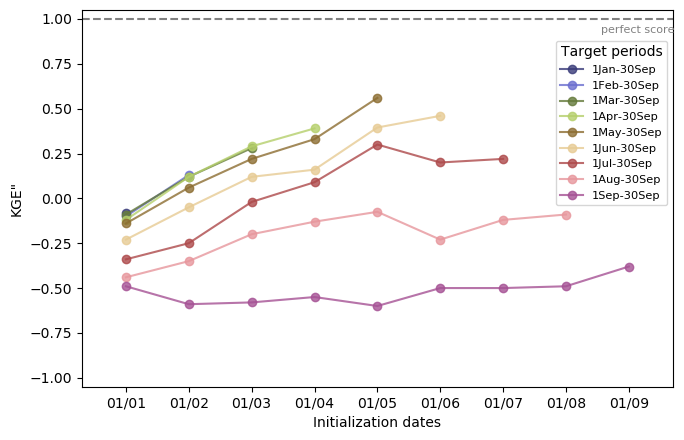

In [47]:
import os
import xarray as xr
import matplotlib.pyplot as plt
n_l_and_n_reg_path = "../CH_data/CH_camels_output_data/nival_lim_reg"

# List of all .nc files in the directory
nc_files = [os.path.join(n_l_and_n_reg_path, f) for f in os.listdir(n_l_and_n_reg_path) if f.endswith('.nc')]

# Load each .nc file as an xarray Dataset and compute the median of each variable
datasets = [xr.open_dataset(f) for f in nc_files]

# Take the median across all datasets for each variable
median_ds = xr.concat(datasets, dim="iteration").median(dim="iteration")

# Display the final dataset with median values
print(median_ds)

# Use the median dataset loaded earlier (median_ds) for the 'KGE"' data
KGE_median = median_ds['KGE"']

# Initialize elements for the plot
fig = plt.figure(figsize=(7, 4.5))
elem = -1
cmap = plt.cm.get_cmap('tab20b')
rgbas = []
target_periods = median_ds.target_period.values
init_dates = median_ds.init_date.values

# Loop over the target periods to plot
for t in target_periods:
    elem += 1
    rgba = cmap((1 * elem) / len(target_periods))
    rgbas.append(rgba)

    # Select and plot the KGE" median data for each target period
    toplot = KGE_median.sel(target_period=t)
    plt.plot(np.arange(len(toplot.init_date)), toplot.values, marker='o', color=rgba, alpha=.8, label=t)

# Add elements to the plot
plt.ylim(-1.05, 1.05)
plt.xlim(-.7, len(init_dates) - .3)
#plt.plot([-.7, len(init_dates) - .3], [-.41, -.41], color='grey', ls='--', zorder=1)
#plt.annotate('lower benchmark', (len(init_dates) - 1.8, -.5), color='grey', fontsize=8)
plt.plot([-.7, len(init_dates) - .3], [1, 1], color='grey', ls='--', zorder=1)
plt.annotate('perfect score', (len(init_dates) - 1.45, .92), color='grey', fontsize=8)
plt.xticks(np.arange(0, len(init_dates)), init_dates)
plt.xlabel('Initialization dates')
plt.ylabel('KGE"')
plt.legend(title='Target periods', loc='center right', bbox_to_anchor=(1, .7), fontsize=8.18)
plt.tight_layout()

# Display the plot
plt.show()

In [48]:
fig.savefig('../CH_data/evaluation_20241129/KGE_n_limited_reg.png', dpi=300)

<xarray.Dataset>
Dimensions:        (init_date: 9, target_period: 9)
Coordinates:
  * init_date      (init_date) object '01/01' '01/02' ... '01/08' '01/09'
  * target_period  (target_period) object '1Jan-30Sep' ... '1Sep-30Sep'
Data variables:
    R2             (init_date, target_period) float64 0.06 0.08 ... nan 0.04
    KGE"           (init_date, target_period) float64 -0.1 -0.13 ... nan -0.34
    KGE"_r         (init_date, target_period) float64 0.11 0.1 0.1 ... nan -0.11
    KGE"_alpha     (init_date, target_period) float64 0.39 0.375 ... nan 0.27
    KGE"_beta      (init_date, target_period) float64 0.01 0.01 ... nan 0.01
    perc_diff      (init_date, target_period) float64 3.07 3.425 ... nan 8.215


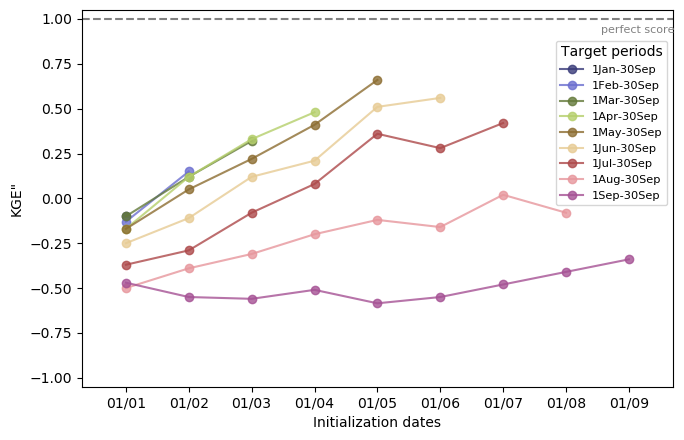

In [18]:
#nival, regulation below 0 (low and no) and glacieted area below 10%

nival_limited_reg_and_glac = "../CH_data/CH_camels_output_data/nival_lim_glac_and_reg"

# List of all .nc files in the directory
nc_files = [os.path.join(nival_limited_reg_and_glac, f) for f in os.listdir(nival_limited_reg_and_glac) if f.endswith('.nc')]

# Load each .nc file as an xarray Dataset and compute the median of each variable
datasets = [xr.open_dataset(f) for f in nc_files]

# Take the median across all datasets for each variable
median_ds = xr.concat(datasets, dim="iteration").median(dim="iteration")

# Display the final dataset with median values
print(median_ds)

# Use the median dataset loaded earlier (median_ds) for the 'KGE"' data
KGE_median = median_ds['KGE"']

# Initialize elements for the plot
fig = plt.figure(figsize=(7, 4.5))
elem = -1
cmap = plt.cm.get_cmap('tab20b')
rgbas = []
target_periods = median_ds.target_period.values
init_dates = median_ds.init_date.values

# Loop over the target periods to plot
for t in target_periods:
    elem += 1
    rgba = cmap((1 * elem) / len(target_periods))
    rgbas.append(rgba)

    # Select and plot the KGE" median data for each target period
    toplot = KGE_median.sel(target_period=t)
    plt.plot(np.arange(len(toplot.init_date)), toplot.values, marker='o', color=rgba, alpha=.8, label=t)

# Add elements to the plot
plt.ylim(-1.05, 1.05)
plt.xlim(-.7, len(init_dates) - .3)
#plt.plot([-.7, len(init_dates) - .3], [-.41, -.41], color='grey', ls='--', zorder=1)
#plt.annotate('lower benchmark', (len(init_dates) - 1.8, -.5), color='grey', fontsize=8)
plt.plot([-.7, len(init_dates) - .3], [1, 1], color='grey', ls='--', zorder=1)
plt.annotate('perfect score', (len(init_dates) - 1.45, .92), color='grey', fontsize=8)
plt.xticks(np.arange(0, len(init_dates)), init_dates)
plt.xlabel('Initialization dates')
plt.ylabel('KGE"')
plt.legend(title='Target periods', loc='center right', bbox_to_anchor=(1, .7), fontsize=8.18)
plt.tight_layout()

# Display the plot
plt.show()



In [19]:
fig.savefig('../CH_data/evaluation_20241129/KGE_n_nival_lim_glac_and_reg_median.png', dpi=300)

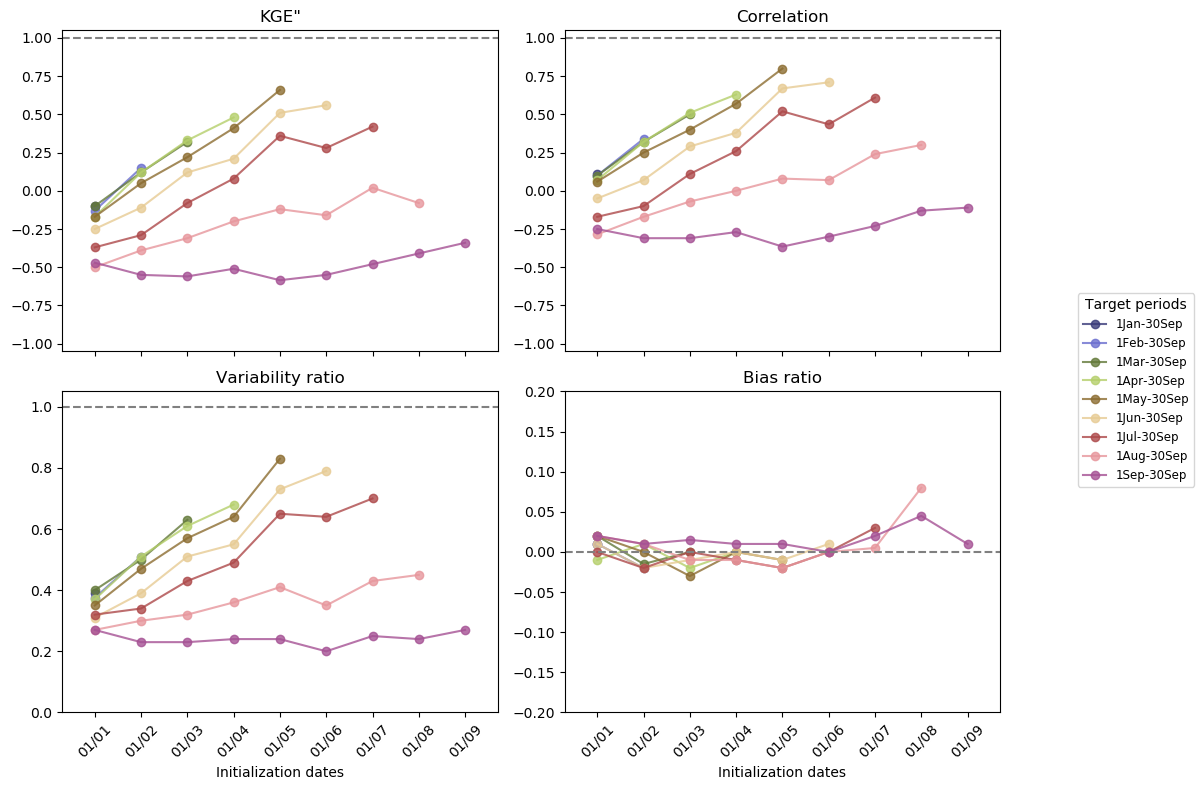

In [23]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import os

# Path to your data directory
nival_limited_reg_and_glac = "../CH_data/CH_camels_output_data/nival_lim_glac_and_reg"

# List all .nc files and compute the median dataset
nc_files = [os.path.join(nival_limited_reg_and_glac, f) for f in os.listdir(nival_limited_reg_and_glac) if f.endswith('.nc')]
datasets = [xr.open_dataset(f) for f in nc_files]
median_ds = xr.concat(datasets, dim="iteration").median(dim="iteration")

# Initialize plot
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
cmap = plt.cm.get_cmap('tab20b')
target_periods = median_ds.target_period.values
init_dates = median_ds.init_date.values

# Variables and their y-axis ranges
variables = {
    "KGE\"": {"ylabel": "KGE\"", "ylim": (-1.05, 1.05)},
    "KGE\"_r": {"ylabel": "Correlation", "ylim": (-1.05, 1.05)},
    "KGE\"_alpha": {"ylabel": "Variability ratio", "ylim": (0.0, 1.05)},
    "KGE\"_beta": {"ylabel": "Bias ratio", "ylim": (-0.2, 0.2)}
}

axes_list = axes.flatten()
lines = []  # Store handles for a single legend

# Loop over variables and plot each one
for idx, (var, props) in enumerate(variables.items()):
    ax = axes_list[idx]
    for i, t in enumerate(target_periods):
        rgba = cmap(i / len(target_periods))
        toplot = median_ds[var].sel(target_period=t)
        line, = ax.plot(np.arange(len(init_dates)), toplot.values, marker='o', color=rgba, alpha=0.8, label=t if idx == 0 else "")
        if idx == 0:  # Only collect the legend handles once
            lines.append(line)

    # Apply axis settings
    ax.set_title(props["ylabel"])
    ax.set_ylim(props["ylim"])
    ax.set_xlim(-0.7, len(init_dates) - 0.3)
    ax.set_xticks(np.arange(len(init_dates)))
    ax.set_xticklabels(init_dates, rotation=45)

    # Add "perfect score" line if necessary
    if var == "KGE\"_beta":
        ax.plot([-0.7, len(init_dates) - 0.3], [0, 0], color='grey', ls='--', label='Perfect score')
    if var == "KGE\"":
        ax.plot([-0.7, len(init_dates) - 0.3], [1, 1], color='grey', ls='--', label='Perfect score')
    if var == "KGE\"_r":
        ax.plot([-0.7, len(init_dates) - 0.3], [1, 1], color='grey', ls='--', label='Perfect score')
    if var == "KGE\"_alpha":
        ax.plot([-0.7, len(init_dates) - 0.3], [1, 1], color='grey', ls='--', label='Perfect score')
# Add common x-labels
axes[1, 0].set_xlabel("Initialization dates")
axes[1, 1].set_xlabel("Initialization dates")

# Create a single shared legend
fig.legend(handles=lines, labels=[str(t) for t in target_periods], title="Target periods",
           loc="center right", bbox_to_anchor=(1, 0.5), fontsize=8.5)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


In [24]:
fig.savefig('../CH_data/evaluation_20241129/KGE_n_nival_lim_glac_and_reg_decompo.png', dpi=300)

<xarray.Dataset>
Dimensions:        (init_date: 9, target_period: 9)
Coordinates:
  * target_period  (target_period) object '1Jan-30Sep' ... '1Sep-30Sep'
  * init_date      (init_date) object '01/01' '01/02' ... '01/08' '01/09'
Data variables:
    R2             (init_date, target_period) float64 0.06 0.08 ... nan 0.04
    KGE"           (init_date, target_period) float64 -0.1 -0.13 ... nan -0.34
    KGE"_r         (init_date, target_period) float64 0.11 0.1 0.1 ... nan -0.11
    KGE"_alpha     (init_date, target_period) float64 0.39 0.375 ... nan 0.27
    KGE"_beta      (init_date, target_period) float64 0.01 0.01 ... nan 0.01
    perc_diff      (init_date, target_period) float64 3.07 3.425 ... nan 8.215
<xarray.Dataset>
Dimensions:        (init_date: 9, target_period: 9)
Coordinates:
  * target_period  (target_period) object '1Jan-30Sep' ... '1Sep-30Sep'
  * init_date      (init_date) object '01/01' '01/02' ... '01/08' '01/09'
Data variables:
    R2             (init_date, target_per

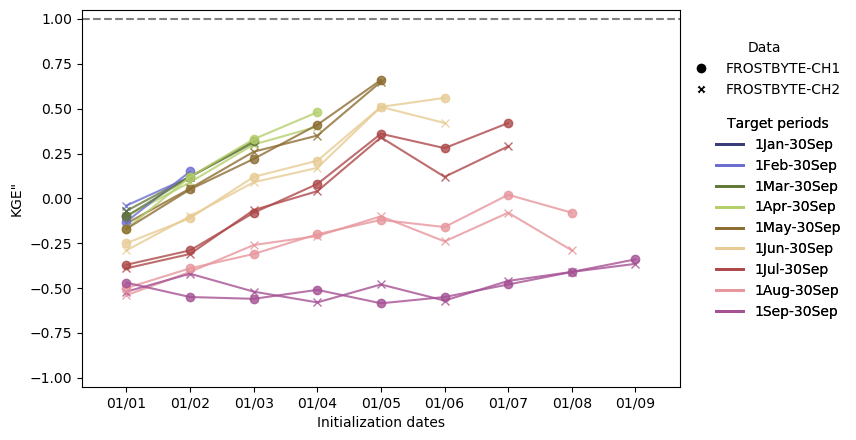

In [67]:
# Camels only nival, regulation below 0 (low and no) and glacieted area below 10%
# comparison to envidat
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

C_nival_limited_reg_and_glac = "../CH_data/CH_camels_output_data/nival_lim_glac_and_reg"
nival_limited_reg_and_glac = "../CH_data/CH_output_data/nival_limited_reg_and_glac"

# List of all .nc files in the directory
C_nc_files = [os.path.join(C_nival_limited_reg_and_glac, f) for f in os.listdir(C_nival_limited_reg_and_glac) if f.endswith('.nc')]
nc_files = [os.path.join(nival_limited_reg_and_glac, f) for f in os.listdir(nival_limited_reg_and_glac) if f.endswith('.nc')]

# Load each .nc file as an xarray Dataset and compute the median of each variable
C_datasets = [xr.open_dataset(f) for f in C_nc_files]
datasets = [xr.open_dataset(f) for f in nc_files]

# Take the median across all datasets for each variable
C_median_ds = xr.concat(C_datasets, dim="iteration").median(dim="iteration")
median_ds = xr.concat(datasets, dim="iteration").median(dim="iteration")

# Display the final dataset with median values
print(C_median_ds)
print(median_ds)

# Use the median dataset loaded earlier (median_ds) for the 'KGE"' data
C_KGE_median = C_median_ds['KGE"']
KGE_median = median_ds['KGE"']

# Initialize elements for the plot
fig = plt.figure(figsize=(7, 4.5))
elem = -1
cmap = plt.cm.get_cmap('tab20b')
rgbas = []
target_periods = median_ds.target_period.values
init_dates = median_ds.init_date.values



# Envidat Loop over the target periods to plot
for t in target_periods:
    elem += 1
    rgba = cmap((1 * elem) / len(target_periods))
    rgbas.append(rgba)

    # Select and plot the KGE" median data for each target period
    toplot = KGE_median.sel(target_period=t)
    plt.plot(np.arange(len(toplot.init_date)), toplot.values, marker='x', color=rgba, alpha=.8, label=t)    
# Reset elem counter for consistent colors
elem = -1

# Camels Loop over the target periods to plot
for t in target_periods:
    elem += 1
    rgba = cmap((1 * elem) / len(target_periods))
    rgbas.append(rgba)

    # Select and plot the KGE" median data for each target period
    toplot = C_KGE_median.sel(target_period=t)
    plt.plot(np.arange(len(toplot.init_date)), toplot.values, marker='o', color=rgba, alpha=.8, label=t)
    
"""
# Data sources legend
custom_lines = [Line2D([0], [0], marker='X', color='w', markerfacecolor='black', markersize=7, label='2. Run (distributed input data)'),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=8, label='1. Run (aggregated input data)')]


# Target periods legend
target_lines = [Line2D([0], [0], color=rgba, lw=2, label=str(t)) for t, rgba in zip(target_periods, rgbas[:len(target_periods)])]

# Add legends to the plot with adjusted positions
legend1 = plt.legend(handles=custom_lines, title='Data', loc='upper right', bbox_to_anchor=(1.26, 0.95))  # Move higher
legend2 = plt.legend(handles=target_lines, title='Target periods', loc='center right', bbox_to_anchor=(1.25, 0.37))  # Move lower

# Add legends to plot
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
"""
# Data sources legend (reversed order)
custom_lines = [Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=8, label='FROSTBYTE-CH1'),
                Line2D([0], [0], marker='X', color='w', markerfacecolor='black', markersize=7, label='FROSTBYTE-CH2')]

# Target periods legend
target_lines = [Line2D([0], [0], color=rgba, lw=2, label=str(t)) for t, rgba in zip(target_periods, rgbas[:len(target_periods)])]
"""
# Add legends to the plot with adjusted positions
legend1 = plt.legend(handles=custom_lines, title='Data', loc='upper right', bbox_to_anchor=(1.26, 0.95))  # Move higher
legend2 = plt.legend(handles=target_lines, title='Target periods', loc='center right', bbox_to_anchor=(1.25, 0.37))  # Move lower

# Add legends to plot
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)"""
# Add legends to the plot with the same width and alignment
legend1 = plt.legend(handles=custom_lines, title='Data', loc='upper right',
                     bbox_to_anchor=(1.29, 0.95), frameon=False)  # Move higher

legend2 = plt.legend(handles=target_lines, title='Target periods', loc='upper right',
                     bbox_to_anchor=(1.29, 0.75), frameon=False)  # Move lower

# Add legends to plot
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
# Add elements to the plot
plt.ylim(-1.05, 1.05)
plt.xlim(-.7, len(init_dates) - .3)
#plt.plot([-.7, len(init_dates) - .3], [-.41, -.41], color='grey', ls='--', zorder=1)
#plt.annotate('lower benchmark', (len(init_dates) - 1.8, -.5), color='grey', fontsize=8)
plt.plot([-.7, len(init_dates) - .3], [1, 1], color='grey', ls='--', zorder=1)
#plt.annotate('perfect score', (len(init_dates) - 1.45, .9), color='grey', fontsize=8)
plt.xticks(np.arange(0, len(init_dates)), init_dates)
plt.xlabel('Initialization dates')
plt.ylabel('KGE"')
#plt.legend(title='Target periods', loc='center right', bbox_to_anchor=(1.25, .5))
plt.tight_layout()

# Display the plot
plt.show()


In [68]:
fig.savefig('../CH_data/CH_output_plots/evaluation/KGE_n_limited_comparison_median.png', dpi=300, bbox_inches='tight')


C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in gr

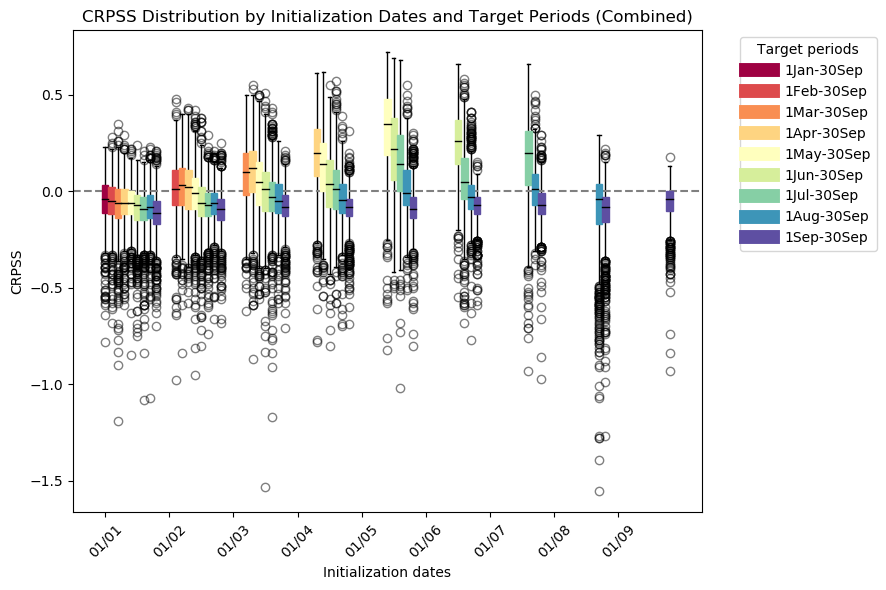

In [1]:
# Probabilistic verification
import os
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Folder where all the .nc files are stored
directory = "../CH_data/CH_camels_output_data/probabilistic_niv_lim"

# Initialize an empty list to store the CRPSS data from each file
all_crpss_data = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        file_path = os.path.join(directory, filename)
        
        # Open the NetCDF file
        data = xr.open_dataset(file_path)
        
        # Extract the CRPSS data and convert it to a DataFrame
        crpss_data = data['CRPSS'].to_dataframe().reset_index()
        
        # Append the data to our list
        all_crpss_data.append(crpss_data)

# Concatenate all CRPSS data into a single DataFrame
combined_crpss_data = pd.concat(all_crpss_data, ignore_index=True)

# Define unique target periods and assign each a color
target_periods = combined_crpss_data['target_period'].unique()
colors = plt.cm.Spectral(np.linspace(0, 1, len(target_periods)))  # Use a color map

# Plotting
fig=plt.figure(figsize=(9, 6))

# Iterate over each target period to plot individually
for i, (color, target_period) in enumerate(zip(colors, target_periods)):
    # Filter data for the current target period
    period_data = combined_crpss_data[combined_crpss_data['target_period'] == target_period]
    
    # For each initialization date, create a boxplot with an offset for visual separation
    for j, init_date in enumerate(period_data['init_date'].unique()):
        # Extract CRPSS values for this init date and target period
        values = period_data[period_data['init_date'] == init_date]['CRPSS'].values
        # Plot boxplot at the correct x-offset (j + small offset for each target period)
        plt.boxplot(values, positions=[j + i * 0.1], widths=0.1, patch_artist=True,
                    boxprops=dict(facecolor=color, color=color),
                    medianprops=dict(color="black"),
                    flierprops=dict(marker='o', color=color, alpha=0.5))

# Set x-axis labels to the unique initialization dates
plt.xticks(ticks=range(len(combined_crpss_data['init_date'].unique())), 
           labels=combined_crpss_data['init_date'].unique(), rotation=45)

# Add plot labels and title
plt.xlabel("Initialization dates")
plt.ylabel("CRPSS")
plt.title("CRPSS Distribution by Initialization Dates and Target Periods (Combined)")
plt.axhline(0, color="gray", linestyle="--")

# Create a custom legend
for color, target_period in zip(colors, target_periods):
    plt.plot([], [], color=color, label=target_period, linewidth=10)
plt.legend(title="Target periods", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

In [2]:
fig.savefig('../CH_data/CH_camels_output_plots/evaluation/CRPSS.png', dpi=300, bbox_inches='tight')

C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in gr

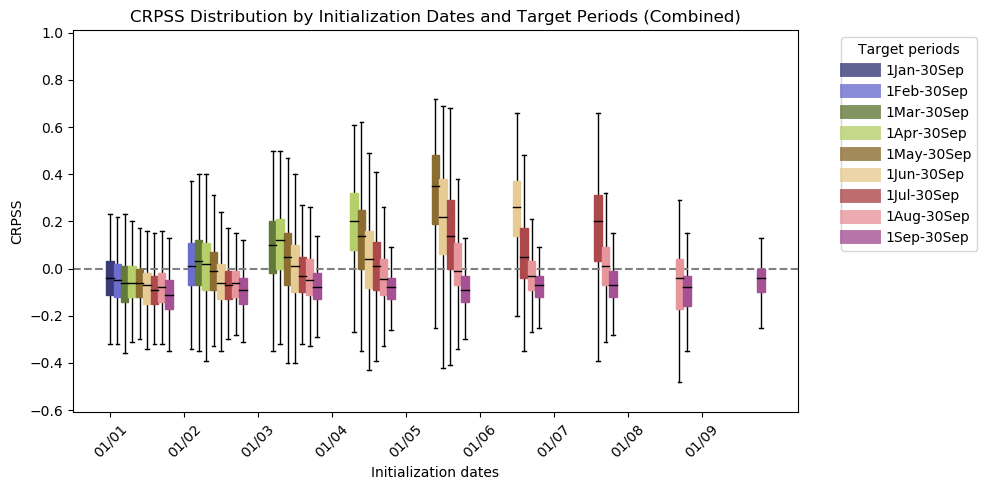

In [3]:
import os
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Folder where all the .nc files are stored
directory = "../CH_data/CH_camels_output_data/probabilistic_niv_lim"

# Initialize an empty list to store the CRPSS data from each file
all_crpss_data = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        file_path = os.path.join(directory, filename)
        
        # Open the NetCDF file
        data = xr.open_dataset(file_path)
        
        # Extract the CRPSS data and convert it to a DataFrame
        crpss_data = data['CRPSS'].to_dataframe().reset_index()
        
        # Append the data to our list
        all_crpss_data.append(crpss_data)

# Concatenate all CRPSS data into a single DataFrame
combined_crpss_data = pd.concat(all_crpss_data, ignore_index=True)

# Define unique target periods and generate colors using tab20b colormap
target_periods = combined_crpss_data['target_period'].unique()
cmap = plt.cm.get_cmap('tab20b')
colors = [cmap(i / len(target_periods)) for i in range(len(target_periods))]

# Plotting
fig = plt.figure(figsize=(10, 5))

# Iterate over each target period to plot individually
for i, (color, target_period) in enumerate(zip(colors, target_periods)):
    # Filter data for the current target period
    period_data = combined_crpss_data[combined_crpss_data['target_period'] == target_period]
    
    # For each initialization date, create a boxplot with an offset for visual separation
    for j, init_date in enumerate(period_data['init_date'].unique()):
        # Extract CRPSS values for this init date and target period
        values = period_data[period_data['init_date'] == init_date]['CRPSS'].values
        # Plot boxplot at the correct x-offset (j + small offset for each target period)
        plt.boxplot(values, positions=[j + i * 0.1], widths=0.1, patch_artist=True,
                    boxprops=dict(facecolor=color, color=color),
                    medianprops=dict(color="black"),
                    flierprops=dict(marker='o', color=color, alpha=0.5),
                    showfliers=False)  # Exclude outliers

# Set x-axis labels to the unique initialization dates
plt.xticks(ticks=range(len(combined_crpss_data['init_date'].unique())), 
           labels=combined_crpss_data['init_date'].unique(), rotation=45)

# Add plot labels and title
plt.xlabel("Initialization dates")
plt.ylabel("CRPSS")
plt.title("CRPSS Distribution by Initialization Dates and Target Periods (Combined)")
plt.axhline(0, color="gray", linestyle="--")

# Adjust the x-axis limits to extend to 1.01
plt.ylim(-0.61, 1.01)

# Create a custom legend
for color, target_period in zip(colors, target_periods):
    plt.plot([], [], color=color, label=target_period, linewidth=10, alpha=0.8)
plt.legend(title="Target periods", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


In [4]:
fig.savefig('../CH_data/CH_camels_output_plots/evaluation/CRPSS.png', dpi=300, bbox_inches='tight')